In [1]:
"""using nographs + graphviz for program environment inspection"""
from functools import wraps, update_wrapper
from ctypes    import cast, py_object
from graphviz  import Digraph
import nographs as nog
# http://magjac.com/graphviz-visual-editor/

In [2]:
dict_1= {0:{1,2,4}, 1:[3,3,3,5], 2:{3,6}, 3:{37}, 37:{7}, 4:{5,6}, 5:{57}, 57:{7},
         6:{67}, 67:{7}, 7:{} }

In [3]:
node_style =dict( style='filled', shape='box', 
                                align='left',
                                fontsize='12',
                                ranksep='0.01',
                                height='0.02',width='0.04',)
gr_style = dict( linelength="16",rankdir='LR',size='16,8',
                # concentrate='true'
               )#landscape="True",splines='curved' ,layout="neato"

def adapter_graphviz( wrapped ):
    """translation to GraphViz visitor"""
    dot = Digraph( node_attr = node_style, graph_attr = gr_style, )
    @wraps( wrapped )
    def wrapper_bg( vert, _trav ):
        dot.node( vert[0], vert[1] )
        for result in wrapped(vert, _trav):
            dot.edge( vert[0], result[0], )# label=f"{str(x)}-{str(result)}",
            yield result
    wrapper_bg.dot = dot
    return wrapper_bg


In [4]:
def ssstr(vert):
    if hasattr( vert, "__call__"):
        vert = type(vert).__name__
    return str(vert)

class translate_nodes:
    # pylint: disable=no-member   #(__wrapped__)
    """morpher for node names base"""
    def __init__(self, wrapped):
        update_wrapper(self, wrapped )
    @staticmethod
    def dress( vert,):
        return ( str(id(vert)), ssstr(vert), vert)
    @staticmethod
    def undress( vert,):
        return vert[2]
    def __call__(self, vert, _trav):
        yield from map( self.dress, self.__wrapped__( self.undress(vert), _trav ) )

class concentrate_edges:
    # pylint: disable=no-member   #(__wrapped__)
    """identity morpher for start"""
    def __init__(self, wrapped):
        update_wrapper(self, wrapped )
    def __call__(self, vert, _trav):
        yield from set(self.__wrapped__( vert, _trav ))

In [5]:
@adapter_graphviz
@concentrate_edges
@translate_nodes
def forward(vert, _):
    """basic `next vertices`"""
    return dict_1[vert]
    
@adapter_graphviz
@concentrate_edges
@translate_nodes
def get_all_attr_objs(var, _trav):
    # for attr_name in dir(var):
    for attr_name, _ in zip(dir(var), range(50)):
        try:
            attr = getattr(var, attr_name)
            #print( f"{id(attr):x}"[:6:], end="    " )
            #if f"{id(attr):x}"[:6:] == f"{id(10):x}"[:6:]:
                # if var not in _trav.paths.get( attr, () ):
            #print(attr)
            # if 
            if attr is not None: #hasattr( attr, "__hash__"):
                yield attr
        except:
            #print(f"!!!{var}-{attr_name}")
            continue

In [6]:
def graph_inspect( obj, forward ):
    trav_forward = nog.TraversalBreadthFirst( forward )
    trav_forward.start_from( obj, build_paths=True )
    for _, _ in zip(trav_forward, range(300)):
        pass
        # str( list(trav_forward) )
    graph_inspect.trav_forward = trav_forward
    return forward
0

0

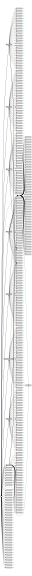

In [7]:
graph_inspect( (str(id(10)),'---',10), get_all_attr_objs ).dot
#graph_inspect( (str(id(0)),'---',0), forward ).dot


In [8]:
graph_inspect( (str(id(6)),'---',6), forward ).dot

In [9]:
class DressCovariant:
    # pylint: disable=no-member   #(__wrapped__)
    """morpher for node names base"""
    def __init__(self, wrapped):
        update_wrapper(self, wrapped )
    @staticmethod
    def dress( vert,):
        return vert % 10
    def __call__(self, vert, _trav):
        yield from map( self.dress, self.__wrapped__(              vert , _trav ) )


@adapter_graphviz
@concentrate_edges
@DressCovariant
def covar_inside(vert, _):
    for attr_name, _ in zip(dir(var), range(50)):
        try:
            attr = getattr(var, attr_name)
            if attr is not None: #hasattr( attr, "__hash__"):
                yield attr
        except:
            continue

graph_inspect( 0, covar_inside ).dot

TypeError: graph_inspect() missing 1 required positional argument: 'forward'

In [ ]:
type(graph_inspect.trav_forward)

In [ ]:
dir(graph_inspect.trav_forward)

In [ ]:
graph_inspect( graph_inspect.trav_forward ).dot